In [2]:
import os


train_dir = os.path.join('C:/Users/s8513/Desktop/동아리/사과, 오렌지 분류/apple_orange_filtered/train')
validation_dir = os.path.join('C:/Users/s8513/Desktop/동아리/사과, 오렌지 분류/apple_orange_filtered/validation')

# 훈련에 사용되는 사과/오렌지 이미지 경로
train_apple_dir = os.path.join('C:/Users/s8513/Desktop/동아리/사과, 오렌지 분류/apple_orange_filtered/train/apple')
train_orange_dir = os.path.join('C:/Users/s8513/Desktop/동아리/사과, 오렌지 분류/apple_orange_filtered/train/orange')

print(train_apple_dir)
print(train_orange_dir)

# 테스트에 사용되는 사과/오렌지 이미지 경로
validation_apple_dir = os.path.join('C:/Users/s8513/Desktop/동아리/사과, 오렌지 분류/apple_orange_filtered/validation/apple')
validation_orange_dir = os.path.join('C:/Users/s8513/Desktop/동아리/사과, 오렌지 분류/apple_orange_filtered/validation/apple')

print(validation_apple_dir)
print(validation_orange_dir)


C:/Users/s8513/Desktop/동아리/사과, 오렌지 분류/apple_orange_filtered/train/apple
C:/Users/s8513/Desktop/동아리/사과, 오렌지 분류/apple_orange_filtered/train/orange
C:/Users/s8513/Desktop/동아리/사과, 오렌지 분류/apple_orange_filtered/validation/apple
C:/Users/s8513/Desktop/동아리/사과, 오렌지 분류/apple_orange_filtered/validation/apple


In [3]:
train_apple_fnames = os.listdir(train_apple_dir)
train_orange_fnames = os.listdir(train_orange_dir)

print(train_apple_fnames[:5])
print(train_orange_fnames[:5])

['사진 다운로드0.jpg', '사진 다운로드1.jpg', '사진 다운로드2.jpg', '사진 다운로드3.jpg', '사진 다운로드4.jpg']
['사진 다운로드0.jpg', '사진 다운로드1.jpg', '사진 다운로드2.jpg', '사진 다운로드3.jpg', '사진 다운로드4.jpg']


In [4]:
print('Total training apple images :', len(os.listdir(train_apple_dir)))
print('Total training orange images :', len(os.listdir(train_orange_dir)))

print('Total validation apple images :', len(os.listdir(validation_apple_dir)))
print('Total validation orange images :', len(os.listdir(validation_orange_dir)))

Total training apple images : 10
Total training orange images : 10
Total validation apple images : 2
Total validation orange images : 2


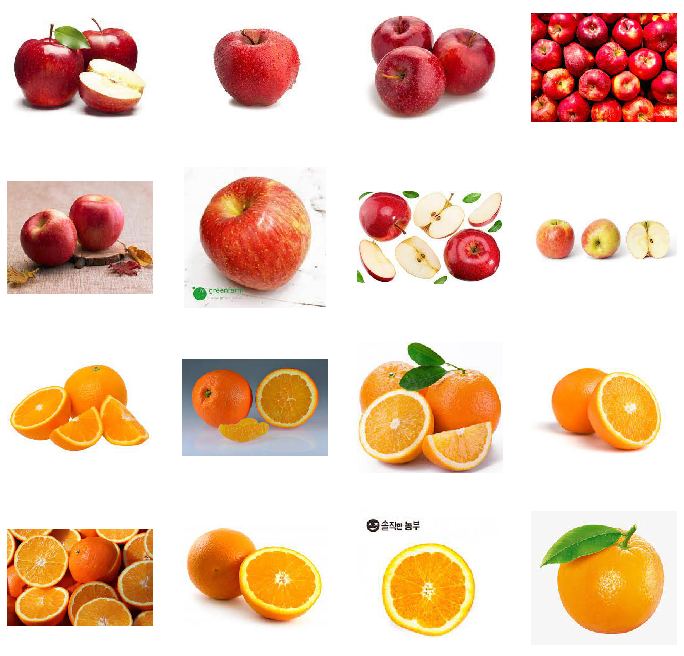

In [5]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8

next_apple_pix = [os.path.join(train_apple_dir, fname)
                for fname in train_apple_fnames[ pic_index-8:pic_index]]

next_orange_pix = [os.path.join(train_orange_dir, fname)
                for fname in train_orange_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_apple_pix+next_orange_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [6]:
import tensorflow as tf


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [7]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
            loss='binary_crossentropy',
            metrics = ['accuracy'])

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150, 150))
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                       batch_size=20,
                                                       class_mode  = 'binary',
                                                       target_size = (150, 150))

Found 20 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


In [11]:
history = model.fit(train_generator,
                    validation_data=validation_generator, epochs = 50)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1 steps, validate for 1 steps
Epoch 1/50
1/1 [==============================] - 1s 652ms/step - loss: 0.3977 - accuracy: 0.8000 - val_loss: 0.3414 - val_accuracy: 0.7500
Epoch 2/50
1/1 [==============================] - 1s 640ms/step - loss: 0.3499 - accuracy: 0.8000 - val_loss: 0.1347 - val_accuracy: 1.0000
Epoch 3/50
1/1 [==============================] - 1s 620ms/step - loss: 0.1869 - accuracy: 1.0000 - val_loss: 0.1901 - val_accuracy: 1.0000
Epoch 4/50
1/1 [==============================] - 1s 618ms/step - loss: 0.2089 - accuracy: 0.9500 - val_loss: 0.0713 - val_accuracy: 1.0000
Epoch 5/50
1/1 [==============================] - 1s 594ms/step - loss: 0.1016 - accuracy: 1.0000 - val_loss: 0.0793 - val_accuracy: 1.0000
Epoch 6/50
1/1 [==============================] - 1s 607ms/step - loss: 0.1075 - accuracy: 0.9500 - val_loss: 0.0290 - val_accuracy: 1.0000
Epoch 7/50
1/1 [==============================] - 1s 599ms/step - loss

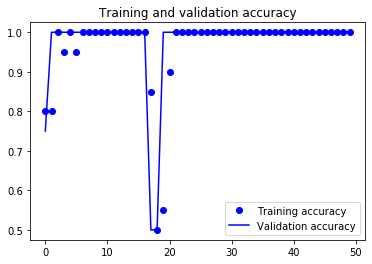

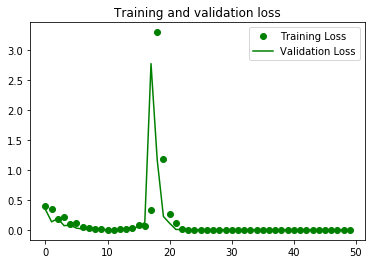

In [12]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [42]:
import numpy as np
#from google.colab import files
from tensorflow import keras
from keras_preprocessing import image
from keras_preprocessing.image import load_img
import os

test_dir = os.path.join('C:/Users/s8513/Desktop/동아리/사과, 오렌지 분류/apple_orange_filtered/test')

for fn in range(len(os.listdir(test_dir))):

    img=load_img('C:/Users/s8513/Desktop/동아리/사과, 오렌지 분류/apple_orange_filtered/test/사진 다운로드' + str(fn) +'.jpg', target_size=(150, 150))

    x=np.array(img)
    x=np.expand_dims(x, axis=0)
    images = np.vstack([x])

    classes = model.predict(images, batch_size=10)

    print(classes[0])

    if classes[0]>0:
        print(str(fn) + " is a apple")
    else:
        print(str(fn) + " is a orange")

[0.]
0 is a orange
[1.]
1 is a apple


In [46]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

    img=image.load_img('C:/Users/s8513/Desktop/동아리/사과, 오렌지 분류/apple_orange_filtered/test/사진 다운로드' + str(fn) +'.jpg'
, target_size=(150, 150))

    x=image.img_to_array(img)
    x=np.expand_dims(x, axis=0)
    images = np.vstack([x])

    classes = model.predict(images, batch_size=10)

    print(classes[0])

    if classes[0]>0:
        print(fn + " is a dog")
    else:
        print(fn + " is a cat")

ModuleNotFoundError: No module named 'google.colab'